<h2>Expoloratory Data Analysis for Telecom Churn Dataset</h2>

Hello one and all, today will be going through the exploratory data analysis of the dataset available for a telecom company. Of course this dataset is clean and doesn’t contain any null values. So data cleaning isn’t a huge process or strainous process in this dataset. However, for all the other parts, such as exploration of data and visualisation, we will be using all the available tools and provide insights in the data. Further the data will be used and run through predictive models or regression models, but that is the case for another day.

<h3>Step I : Importing all the libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt

<h3>Step II : Data Exploration

In [2]:
df = pd.read_csv('churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We are able to see that TotalCharges column is an object. However, we know that total charges should be a numerical value, either float or integer. So we will be converting it to numerical value.

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h3> Step III : Data Cleaning </h3>

We need to check for null values and perform various cleaning techniques available depending on type of data missing, its significance and overall viability of a replacement or removal

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Since only 11 rows contain null values, its better to drop them as its not even 1% of the data

Now we need to filter out the only significant and required columns

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.drop(columns=['customerID'], inplace=True, axis=1)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

<h3>Step IV : Analysis</h3>

Data analysis is of two types, univariate and multivariate. Prior analysis provides critical and very focused analysis for a particular feature of the dataset, the latter analysis will be useful when two or three features combine together to create a critical junction.

<h4> Univariate Analysis </h4>

The best way for univariate analysis is to create graph bins for each and every feature comparing it with our primary feature or the Y feature (here Churn feature). While creating the graphs, we cannot include numerical data and therefore I will be purely focusing on categorical and object based data. Numerical data is not considered in this because it provides a normal graph and therefore not being much useful in this venture.

Feature binning is a very selective process. It’s not always required and at the beginning of this project, it did not feel like it was required here. However, once you see that graphs are being portrayed in a very formal and professional way, except for one, you will realise that there is a need for binning for the tenure feature. Therefore making sure that there is meaningful insights out of this.

In [11]:
bins = [0, 12, 24, 36, 48, 60, 72, float('inf')]
labels = ['0–12', '13–24', '25–36', '37–48', '49–60', '61–72', '73+']

df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True, include_lowest=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0–12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25–36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0–12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37–48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0–12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13–24
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61–72
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0–12
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0–12


In [12]:
bins = [0, 24, 48, 72, 96, 120, float('inf')]
labels = ['0–24', '25–48', '49–72', '73–96', '97–120', '121+']

df['monthly_charges'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels, right=True, include_lowest=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,monthly_charges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0–12,25–48
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,25–36,49–72
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0–12,49–72
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37–48,25–48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0–12,49–72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13–24,73–96
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61–72,97–120
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0–12,25–48
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0–12,73–96


In [13]:
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, float('inf')]
labels = ['0–1000', '1000–2000', '2000–3000', '3000–4000', '4000–5000', '5000–6000', '6000–7000', '7000–8000', '8000+']

df['total_charges'] = pd.cut(df['TotalCharges'], bins=bins, labels=labels, right=True, include_lowest=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,monthly_charges,total_charges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0–12,25–48,0–1000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,25–36,49–72,1000–2000
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0–12,49–72,0–1000
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37–48,25–48,1000–2000
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0–12,49–72,0–1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13–24,73–96,1000–2000
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61–72,97–120,7000–8000
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0–12,25–48,0–1000
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0–12,73–96,0–1000


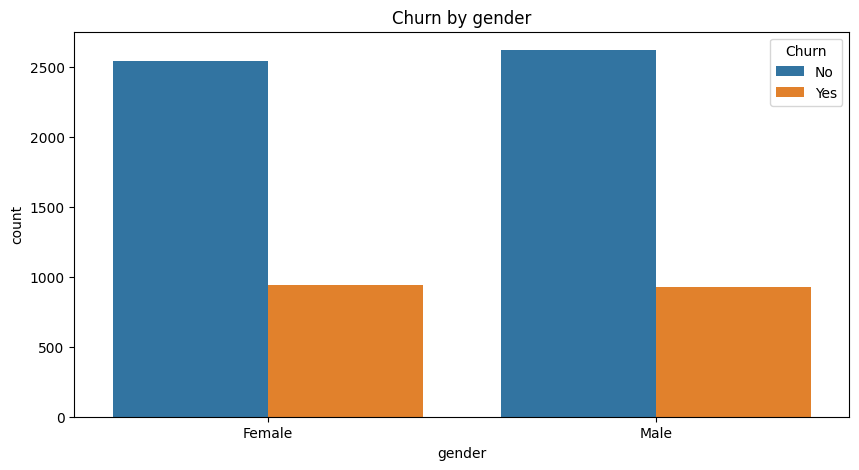

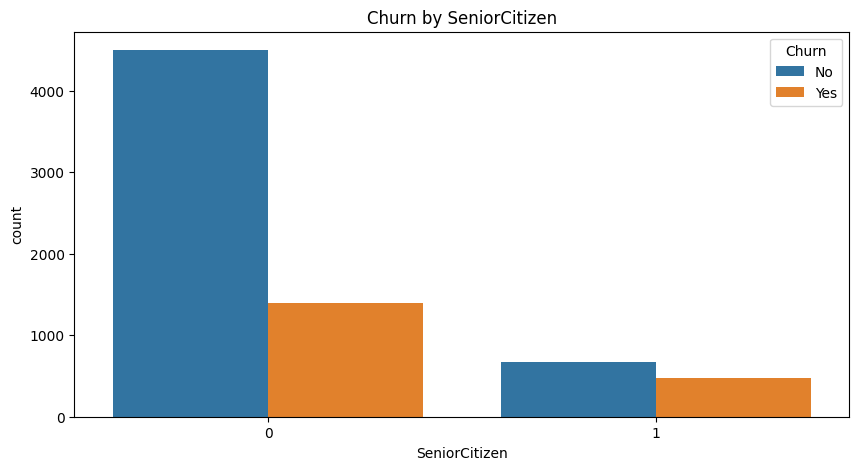

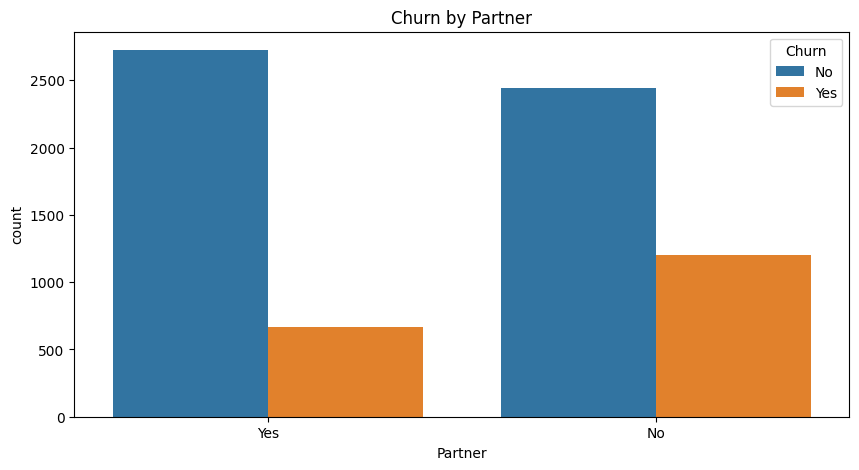

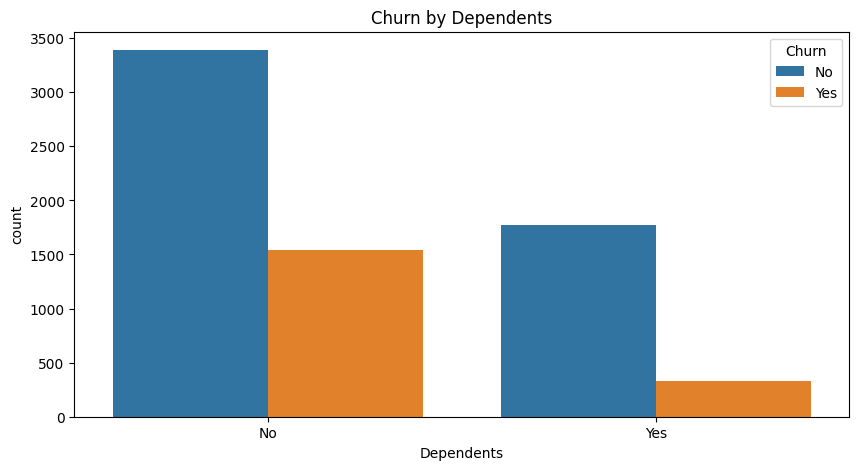

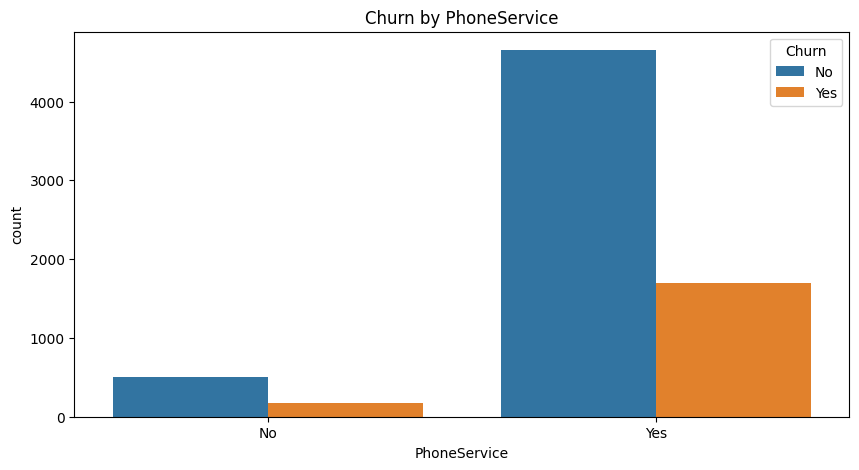

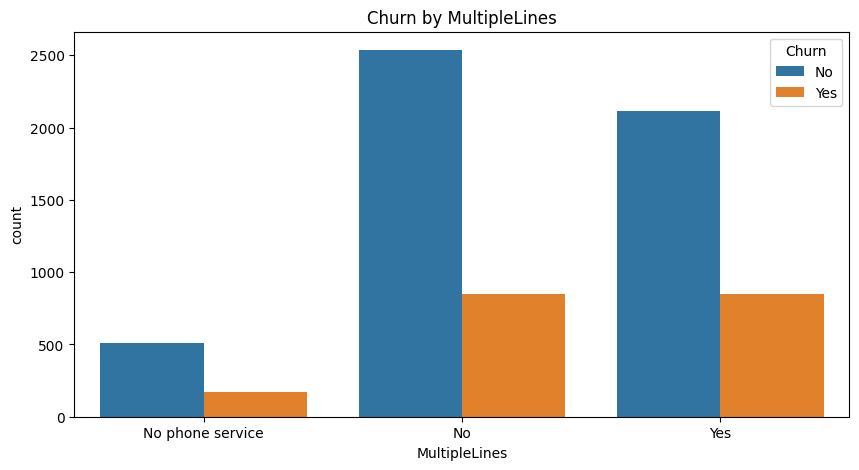

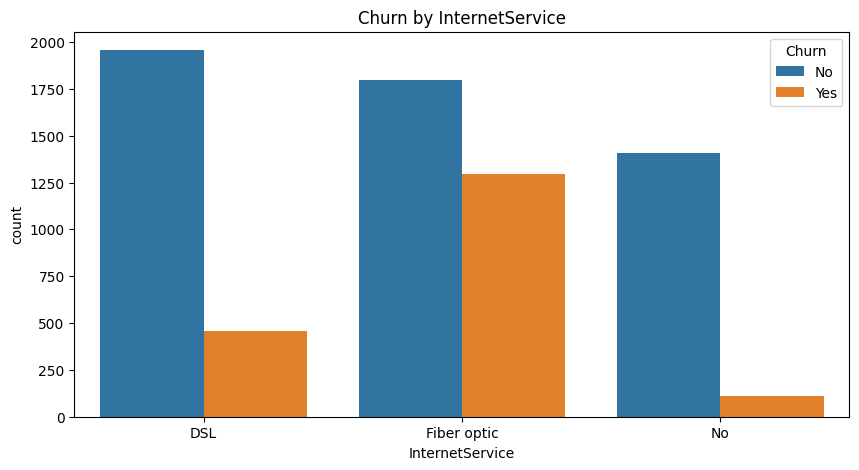

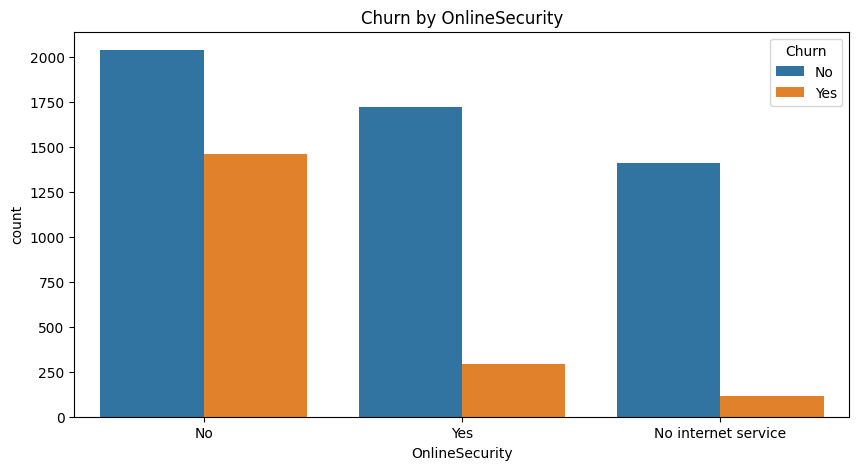

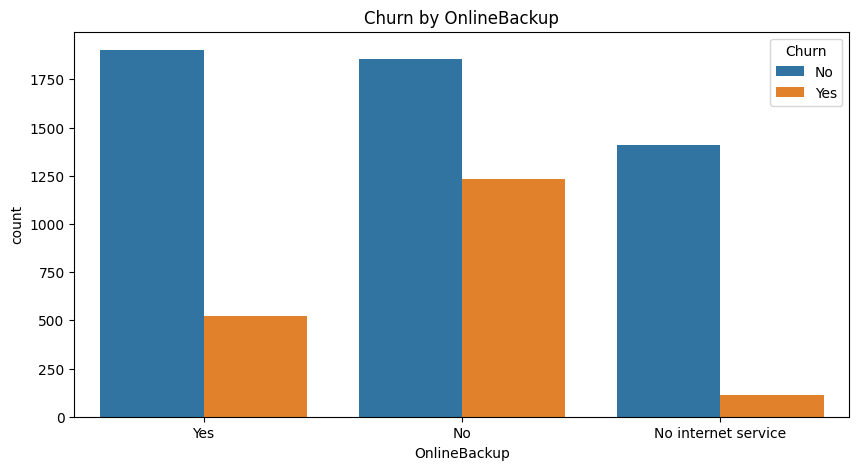

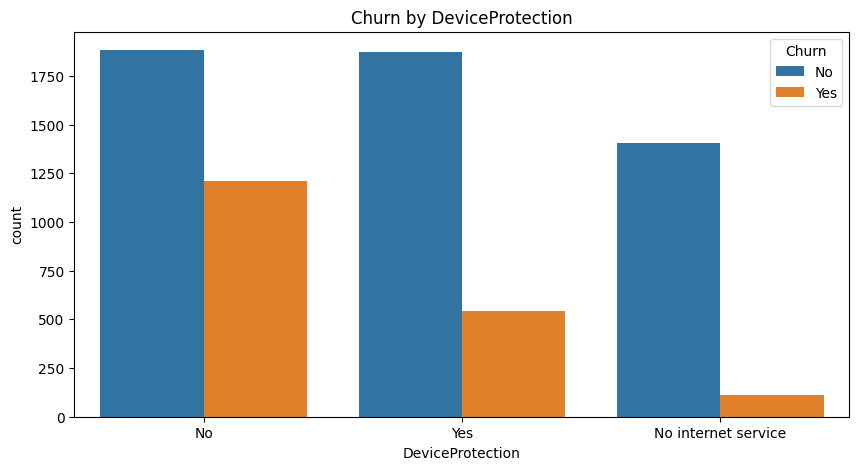

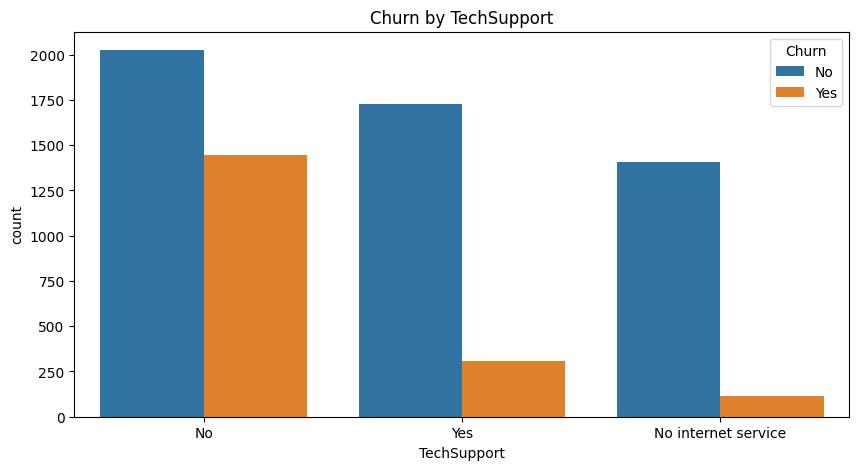

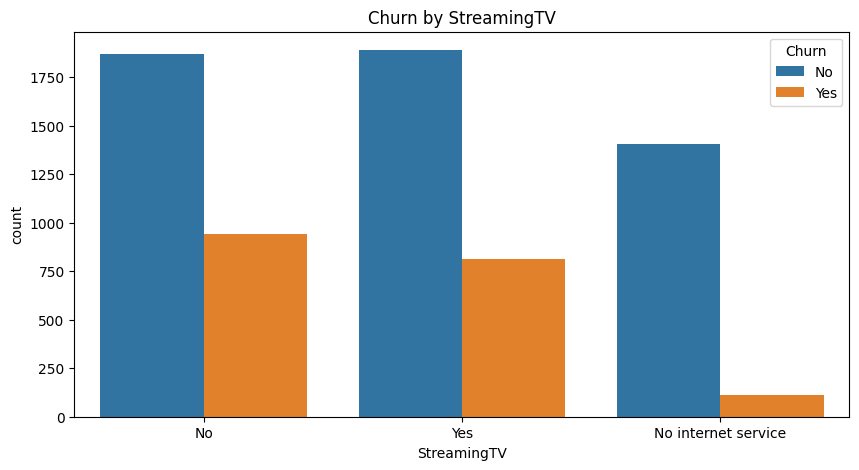

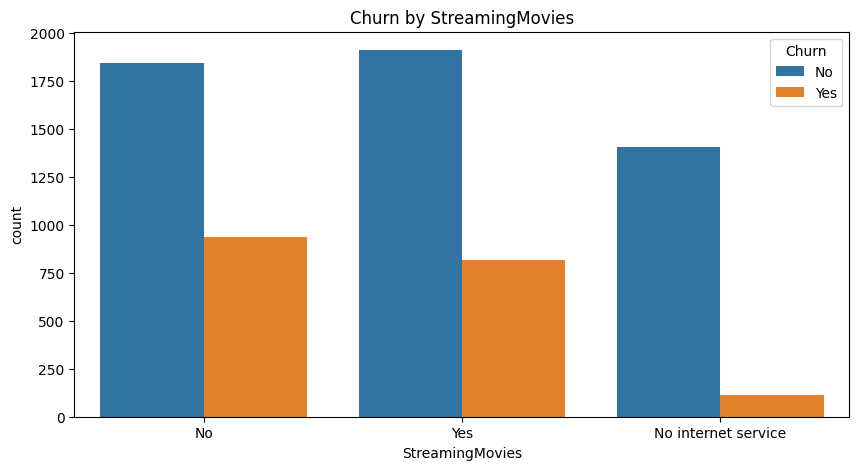

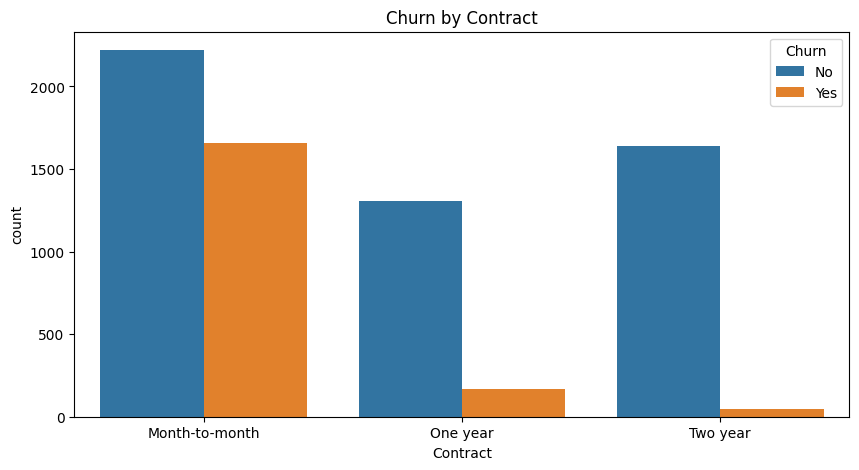

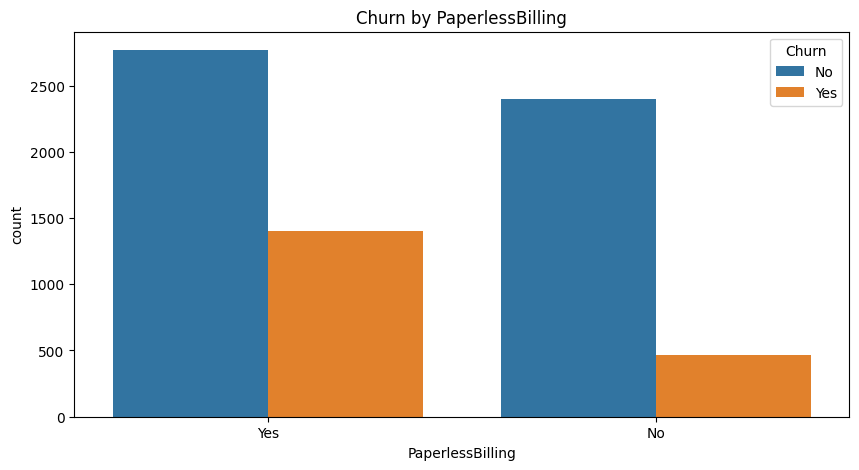

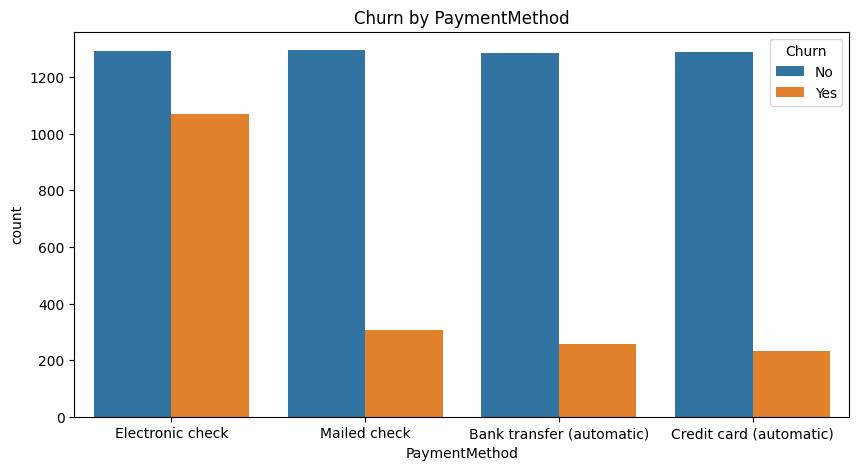

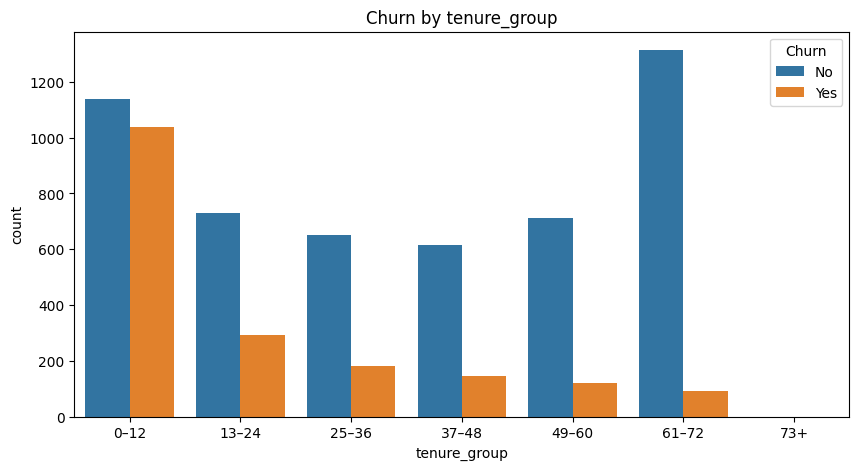

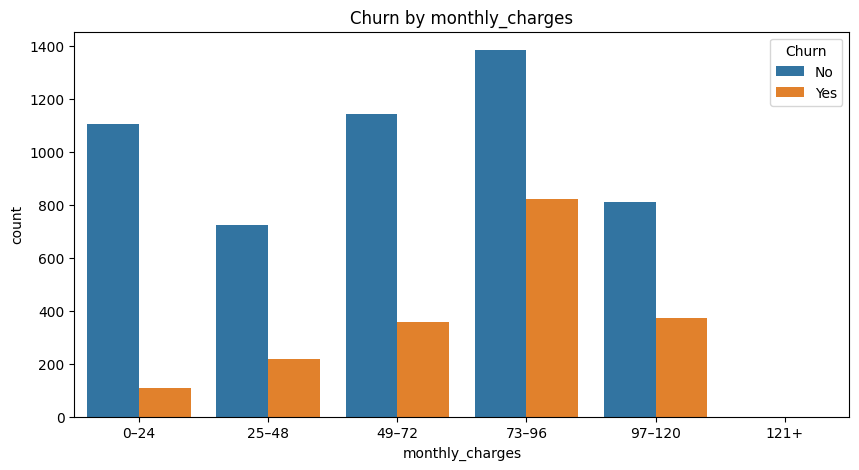

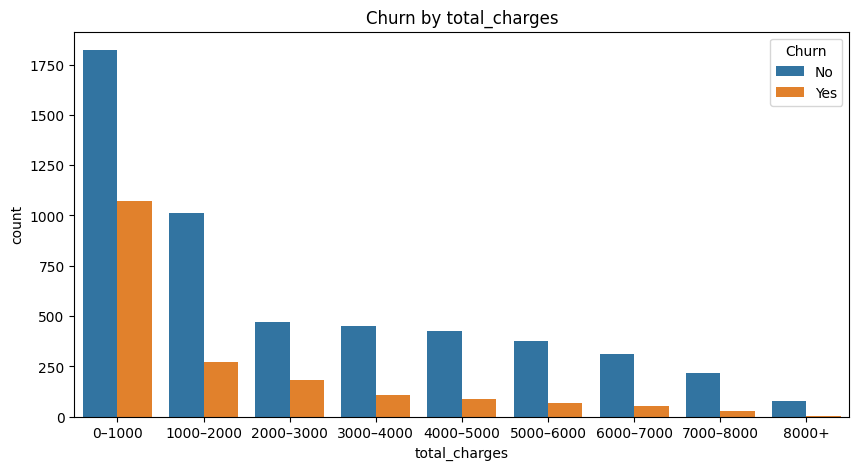

In [14]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges','MonthlyCharges', 'tenure'])):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=predictor, hue='Churn', data=df)
    plt.title(f'Churn by {predictor}')
    plt.show()

<h4>Univariate Analysis Summary</h4>

1. **Churn Rate Overview**  
   The overall churn rate is about **26%**. This serves as a baseline for interpreting individual features.

2. **Demographics (Gender, Senior Citizen, Partner, Dependents)**  
   - **Gender** has no significant impact on churn.  
   - **Senior citizens** are more likely to churn.  
   - Customers **without partners** or **dependents** are more likely to churn, suggesting that family support may influence loyalty.

3. **Phone & Internet Services**  
   - **Phone service** and **multiple lines** show minimal influence.  
   - **Internet service type** matters — **fiber optic users churn more**, while those **without internet** tend to stay.  
   - Use of **tech support**, **streaming services**, and **device protection** correlates with lower churn.

4. **Online Features (Security, Backup, Protection)**  
   - Lack of **online security**, **backup**, or **device protection** is associated with higher churn, especially among internet users.  
   - These features may contribute to customer satisfaction and retention.

5. **Contract & Billing**  
   - Customers on **month-to-month contracts** are far more likely to churn.  
   - **Longer contracts** reduce churn significantly.  
   - **Paperless billing** shows a mild effect — those opting out churn slightly less.

6. **Payment Method**  
   - Customers paying via **electronic check** have a much higher churn rate compared to other methods.

7. **Tenure**  
   - **New customers (0–12 months)** are the most likely to churn.  
   - Churn decreases consistently with longer **tenure**, making it a strong retention indicator.

In conclusion, while some features alone may not seem impactful, their combined effect will become clearer in the multivariate analysis.

<h4> Multivariate Analysis </h4>

Multivariate analysis can be an extensive process and is often broken down into levels such as bivariate, trivariate, or even quadrivariate analysis depending on the project's requirements.

In this case, since we are focusing on **customer churn for a telecom company**, we are limiting our analysis to a few key features that show strong individual influence. Specifically, we will consider:

- **Gender**
- **Charges** (e.g., MonthlyCharges and TotalCharges)
- **Tenure**

These three features will form the foundation of our multivariate analysis. The aim is to understand how their combinations influence churn behavior.

However, if the scope of the project expands in the future, other features can be included or substituted, and the analysis can be extended in a similar manner.


In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,monthly_charges,total_charges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0–12,25–48,0–1000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,25–36,49–72,1000–2000
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0–12,49–72,0–1000
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37–48,25–48,1000–2000
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0–12,49–72,0–1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13–24,73–96,1000–2000
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61–72,97–120,7000–8000
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0–12,25–48,0–1000
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0–12,73–96,0–1000


In [16]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

In [18]:
new_df1_target0=df.loc[df["Churn"]==0]
new_df1_target1=df.loc[df["Churn"]==1]
new_df1_target0.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5163.000000,5163.00000,5163.000000,5163.000000,5163.0
mean,0.128995,37.65001,61.307408,2555.344141,0.0
std,0.335227,24.07694,31.094557,2329.456984,0.0
min,0.000000,1.00000,18.250000,18.800000,0.0
25%,0.000000,15.00000,25.100000,577.825000,0.0
50%,0.000000,38.00000,64.450000,1683.600000,0.0
75%,0.000000,61.00000,88.475000,4264.125000,0.0
max,1.000000,72.00000,118.750000,8672.450000,0.0


In [22]:
didntchurn_counts_by_tenure_gender = pd.crosstab(new_df1_target0['tenure_group'], new_df1_target0['gender'])
churn_counts_by_tenure_gender = pd.crosstab(new_df1_target1['tenure_group'], new_df1_target1['gender'])

didntchurn_counts_by_monthlycharges_gender = pd.crosstab(new_df1_target0['monthly_charges'], new_df1_target0['gender'])
churn_counts_by_monthlycharges_gender = pd.crosstab(new_df1_target1['monthly_charges'], new_df1_target1['gender'])

didntchurn_counts_by_totalcharges_gender = pd.crosstab(new_df1_target0['total_charges'], new_df1_target0['gender'])
churn_counts_by_totalcharges_gender = pd.crosstab(new_df1_target1['total_charges'], new_df1_target1['gender'])

In [29]:
def uniplot_matplotlib(counts_df, title, x_label, y_label='Count'):
    sns.set_style('whitegrid') # Still use seaborn's style settings
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    fig, ax = plt.subplots()

    # Determine dynamic width
    num_x_categories = len(counts_df.index)
    num_hue_categories = len(counts_df.columns) # Number of gender types
    bar_width = 0.35 # Width of individual bars
    spacing = 0.1 # Space between groups of bars
    total_bar_width = bar_width * num_hue_categories + spacing # Total width per group
    width = num_x_categories * total_bar_width * 3 # Adjust multiplier as needed for good spacing
    fig.set_size_inches(width, 8)

    plt.xticks(rotation=45)
    plt.yscale('log') # Keep the log scale as you intended
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Get colors from a seaborn palette
    palette = sns.color_palette('bright', n_colors=num_hue_categories)
    colors = {col: palette[i] for i, col in enumerate(counts_df.columns)}

    x_positions = np.arange(num_x_categories) # Base x-positions for each group

    # Iterate through each 'gender' column and plot its bars
    for i, gender_col in enumerate(counts_df.columns):
        # Offset for each gender bar within a group
        offset = bar_width * i - (bar_width * (num_hue_categories - 1)) / 2
        ax.bar(x_positions + offset, counts_df[gender_col], bar_width,
               label=gender_col, color=colors[gender_col])

    ax.set_xticks(x_positions)
    ax.set_xticklabels(counts_df.index)
    plt.legend(title='gender') # Add a legend for the hue
    plt.grid(True, which="both", ls="--", c='0.7') # Ensure grid is visible with log scale

    plt.show()

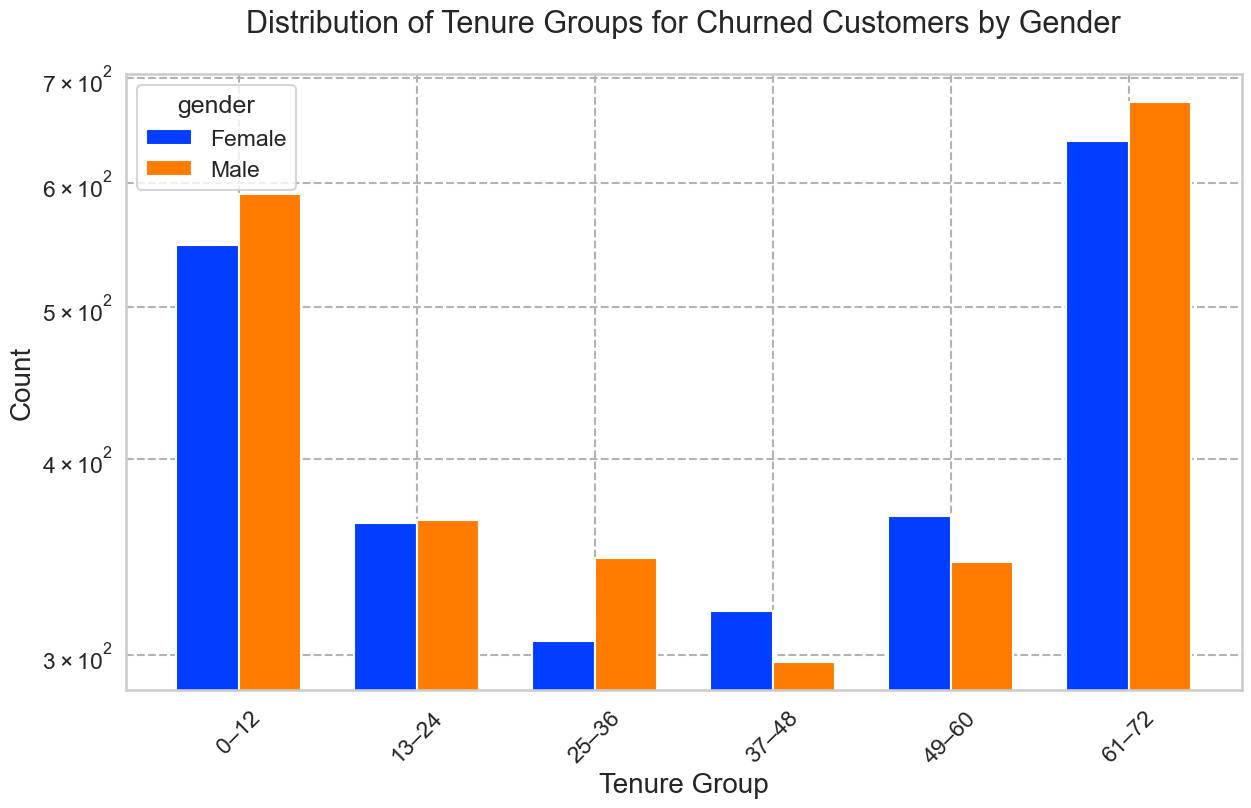

In [30]:
uniplot_matplotlib(counts_df=didntchurn_counts_by_tenure_gender,
                   title='Distribution of Tenure Groups for Churned Customers by Gender',
                   x_label='Tenure Group')

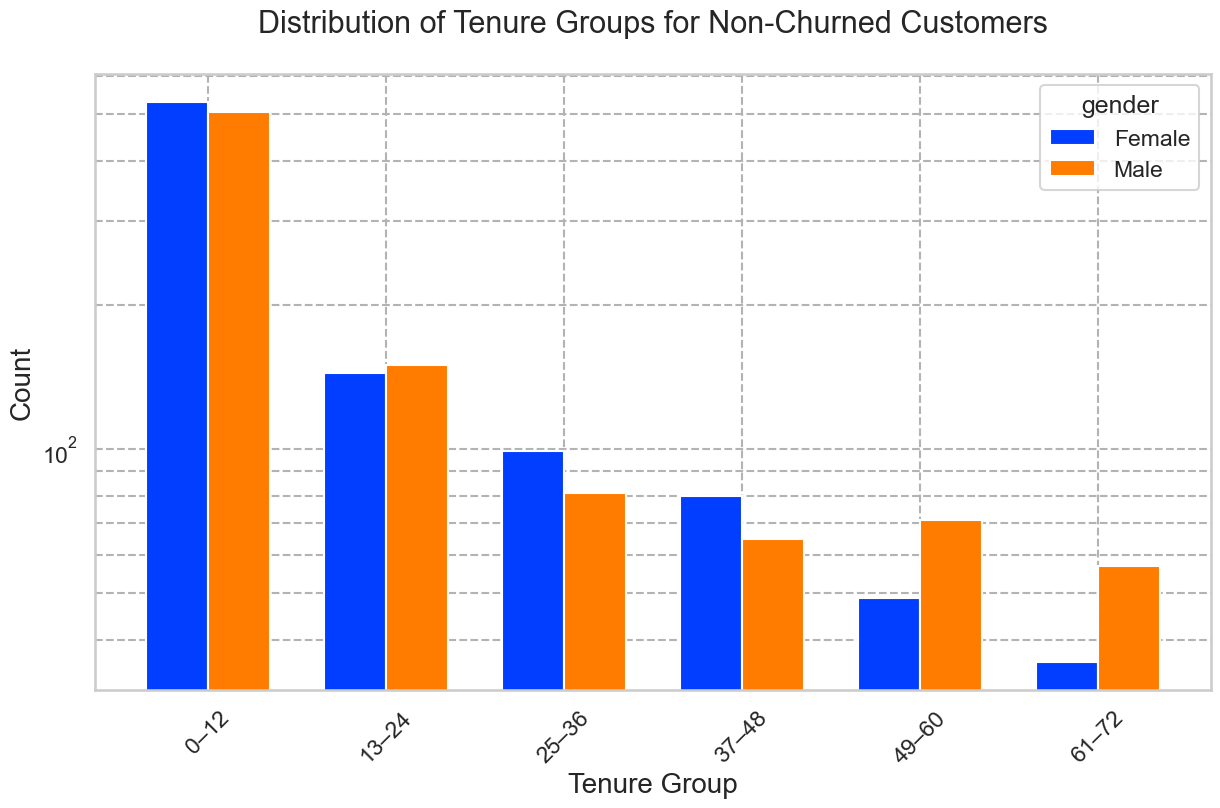

In [31]:
uniplot_matplotlib(counts_df=churn_counts_by_tenure_gender,
                   title='Distribution of Tenure Groups for Non-Churned Customers',
                   x_label='Tenure Group')

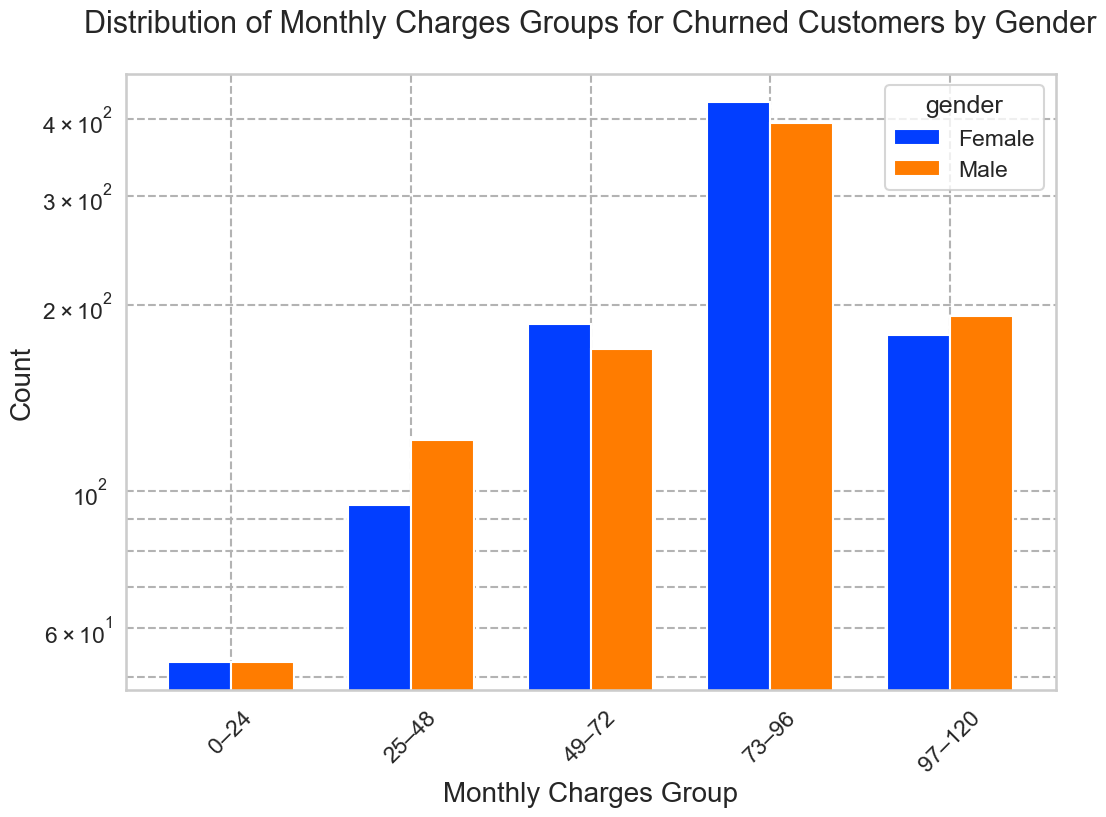

In [37]:
uniplot_matplotlib(counts_df=churn_counts_by_monthlycharges_gender,
                   title='Distribution of Monthly Charges Groups for Churned Customers by Gender',
                   x_label='Monthly Charges Group')

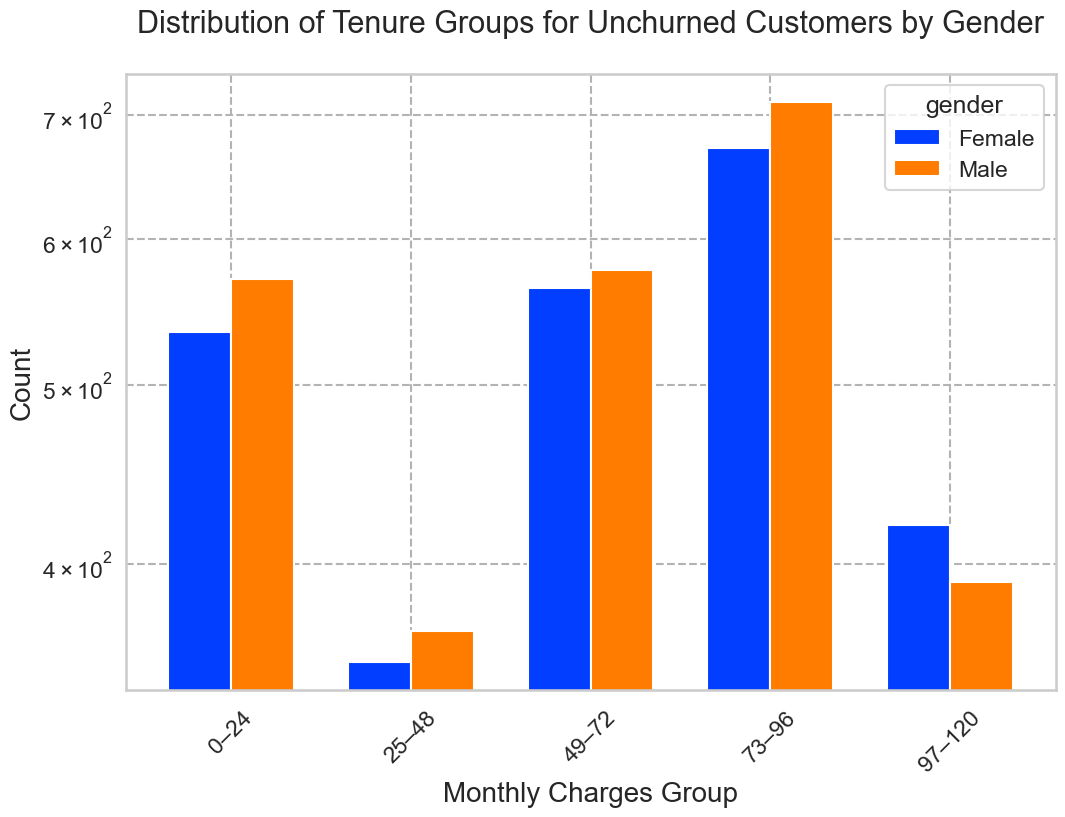

In [36]:
uniplot_matplotlib(counts_df=didntchurn_counts_by_monthlycharges_gender,
                   title='Distribution of Tenure Groups for Unchurned Customers by Gender',
                   x_label='Monthly Charges Group')

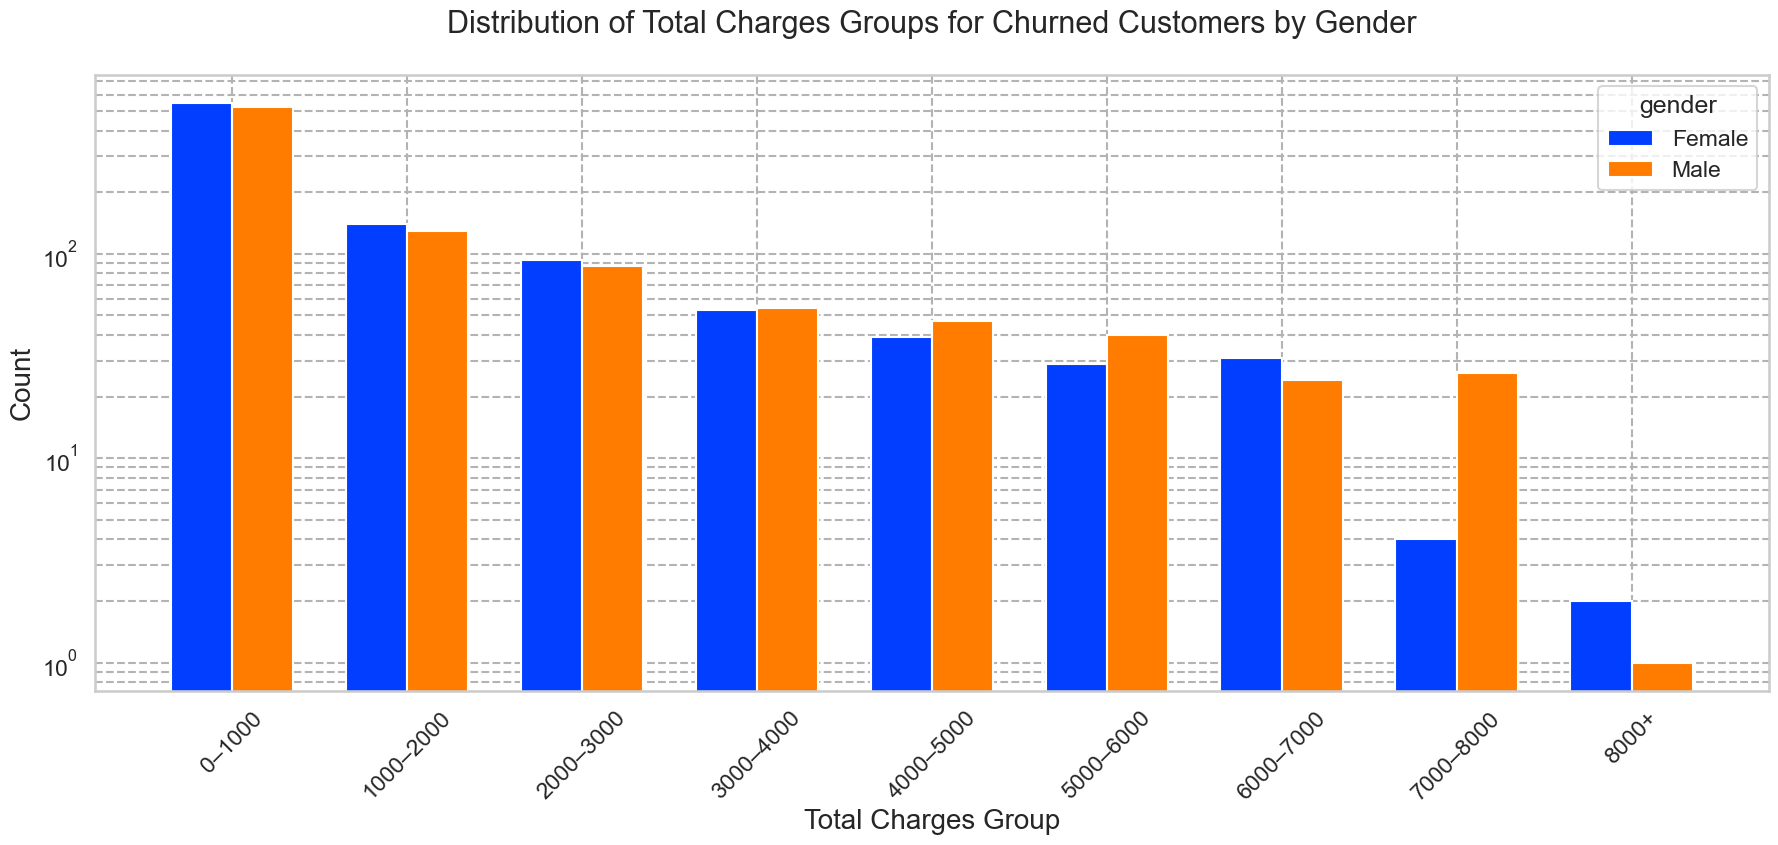

In [34]:
uniplot_matplotlib(counts_df=churn_counts_by_totalcharges_gender,
                   title='Distribution of Total Charges Groups for Churned Customers by Gender',
                   x_label='Total Charges Group')

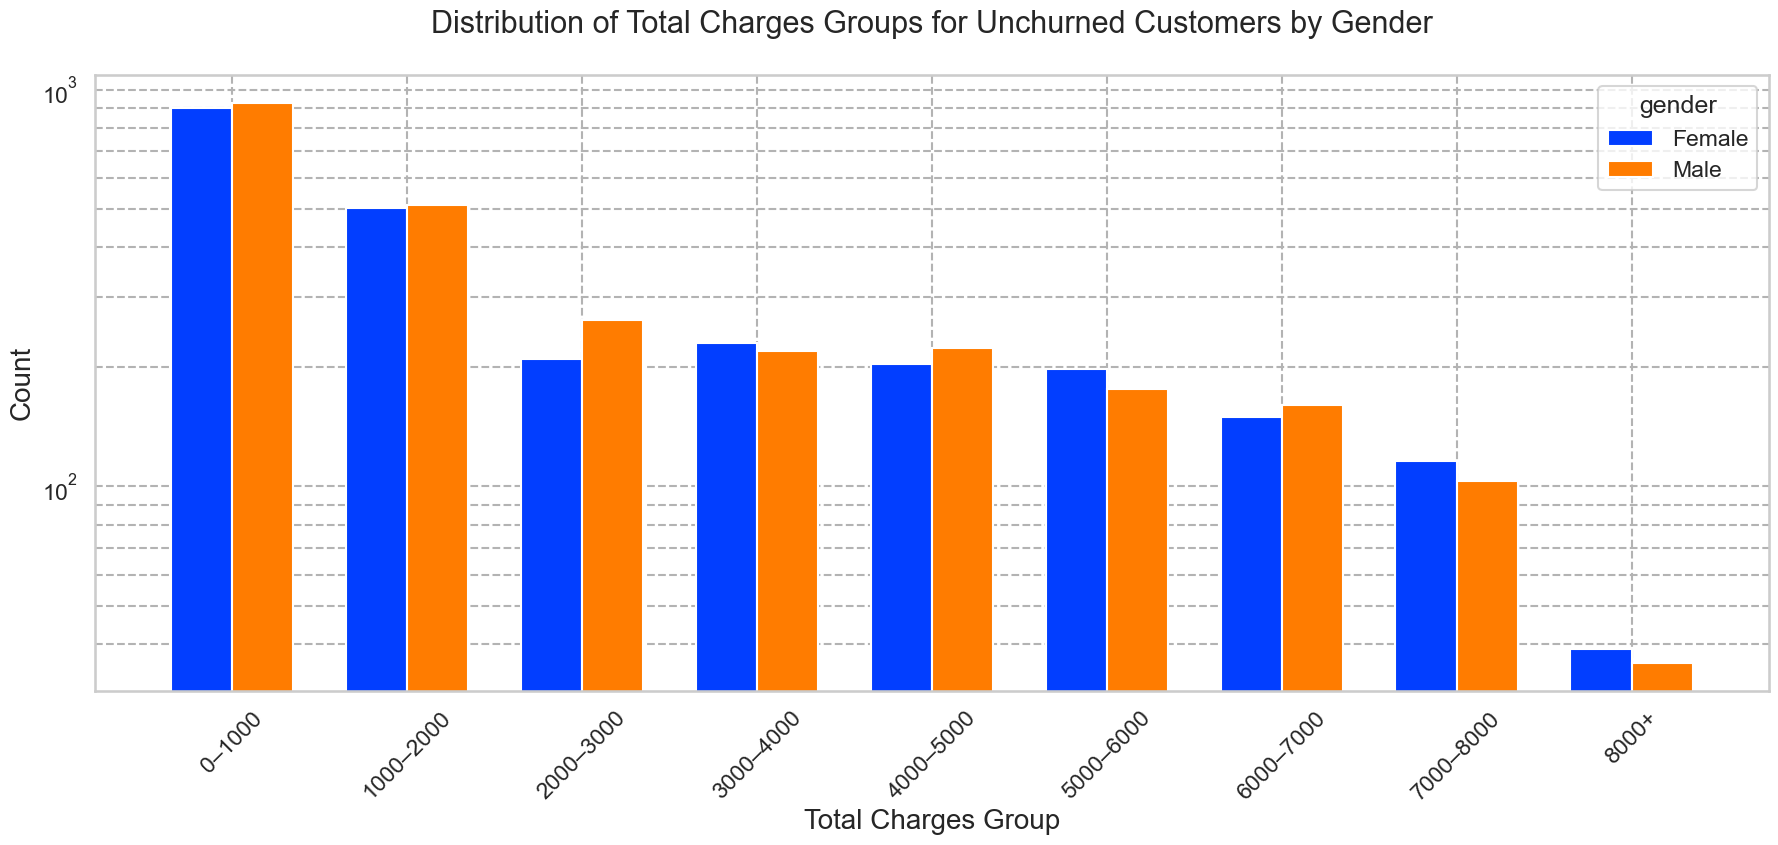

In [35]:
uniplot_matplotlib(counts_df=didntchurn_counts_by_totalcharges_gender,
                   title='Distribution of Total Charges Groups for Unchurned Customers by Gender',
                   x_label='Total Charges Group')